### lambda layer와 Concatenate layer를 사용하여 y = x + 2x^2 + 3x^3 + 1 관계를 fitting

In [1]:
from keras import layers, models
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_train = np.random.rand(1000,1) * 10 - 5
y_train = 1 * x_train + 2 * x_train**2 + 3 * x_train**3 + 1

Using TensorFlow backend.


In [2]:
x = layers.Input(shape=(1,), name='x')

mul1, mul2, mul3 = layers.Lambda(lambda x: [x, x**2, x**3], name='lambda')(x)
concat = layers.Concatenate(name='concat')([mul1, mul2, mul3])

y = layers.Dense(1, name='y')(concat)

model = models.Model(inputs=x, outputs=y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 [(None, 1), (None, 1 0           x[0][0]                          
__________________________________________________________________________________________________
concat (Concatenate)            (None, 3)            0           lambda[0][0]                     
                                                                 lambda[0][1]                     
                                                                 lambda[0][2]                     
__________________________________________________________________________________________________
y (Dense) 

In [3]:
model.compile('adam', 'mse')
hist = model.fit(x_train, y_train, batch_size=10, epochs=200, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 1s 2ms/step - loss: 31486.7355 - val_loss: 33457.5633
Epoch 2/200
800/800 [==============================] - 0s 138us/step - loss: 30280.5147 - val_loss: 32201.4230
Epoch 3/200
800/800 [==============================] - 0s 143us/step - loss: 29085.9051 - val_loss: 30998.3500
Epoch 4/200
800/800 [==============================] - 0s 137us/step - loss: 27953.0183 - val_loss: 29774.5778
Epoch 5/200
800/800 [==============================] - 0s 138us/step - loss: 26846.3021 - val_loss: 28661.9362
Epoch 6/200
800/800 [==============================] - 0s 133us/step - loss: 25783.4027 - val_loss: 27571.0130
Epoch 7/200
800/800 [==============================] - 0s 135us/step - loss: 24752.9613 - val_loss: 26465.1635
Epoch 8/200
800/800 [==============================] - 0s 133us/step - loss: 23745.0452 - val_loss: 25407.5896
Epoch 9/200
800/800 [==============================] - 0s 146us/step

Epoch 75/200
800/800 [==============================] - 0s 139us/step - loss: 119.6951 - val_loss: 153.1032
Epoch 76/200
800/800 [==============================] - 0s 133us/step - loss: 105.2322 - val_loss: 134.6696
Epoch 77/200
800/800 [==============================] - 0s 141us/step - loss: 92.5372 - val_loss: 118.7994
Epoch 78/200
800/800 [==============================] - 0s 137us/step - loss: 81.6245 - val_loss: 104.4921
Epoch 79/200
800/800 [==============================] - 0s 137us/step - loss: 72.1107 - val_loss: 92.2036
Epoch 80/200
800/800 [==============================] - 0s 137us/step - loss: 63.8475 - val_loss: 81.9716
Epoch 81/200
800/800 [==============================] - 0s 145us/step - loss: 56.7915 - val_loss: 72.3469
Epoch 82/200
800/800 [==============================] - 0s 132us/step - loss: 50.6999 - val_loss: 64.0002
Epoch 83/200
800/800 [==============================] - 0s 143us/step - loss: 45.3674 - val_loss: 57.3950
Epoch 84/200
800/800 [==================

800/800 [==============================] - 0s 138us/step - loss: 5.3307 - val_loss: 4.8987
Epoch 153/200
800/800 [==============================] - 0s 138us/step - loss: 5.1429 - val_loss: 4.7149
Epoch 154/200
800/800 [==============================] - 0s 131us/step - loss: 4.9545 - val_loss: 4.5408
Epoch 155/200
800/800 [==============================] - 0s 136us/step - loss: 4.7665 - val_loss: 4.3619
Epoch 156/200
800/800 [==============================] - 0s 133us/step - loss: 4.5866 - val_loss: 4.2013
Epoch 157/200
800/800 [==============================] - 0s 142us/step - loss: 4.4062 - val_loss: 4.0258
Epoch 158/200
800/800 [==============================] - 0s 128us/step - loss: 4.2302 - val_loss: 3.8704
Epoch 159/200
800/800 [==============================] - 0s 142us/step - loss: 4.0453 - val_loss: 3.6946
Epoch 160/200
800/800 [==============================] - 0s 137us/step - loss: 3.8769 - val_loss: 3.5348
Epoch 161/200
800/800 [==============================] - 0s 140us/ste

Text(0, 0.5, 'loss')

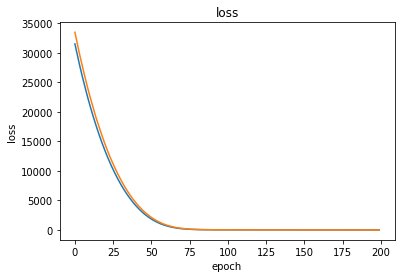

In [4]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [5]:
y_weights = model.get_layer('y').get_weights()
print('y_weights:\n', y_weights)

y_weights:
 [array([[1.3327758],
       [1.9967649],
       [2.9816322]], dtype=float32), array([1.0248761], dtype=float32)]
